# FSDS24 - Week 1, Lab1: Exploring distributions

This lab continues where the walkthrough left off. We now have data which we can load from the Movies stack exchange. We can view that data, filter it and report on it. 

Below are a series of exercises that we will cover in the lab on Monday, October 14, 2024 and review with example answers on October 16, 2024. These exercises will not be graded, but will be part of a warm up to the exercises on Friday which will be given feedback by the TAs and/or the course convenor.

Today's tasks will be about the exploration of this data. It should be a simple exercise to view this work with ample starter code for you to get running. 

You are welcome to both modify this code and to share some example code and visualisations with your peers. 

> Note on data access: The exercise on Friday initially assumed access to the Internet Archive. However, on account of the recent hack of this site, the web portal for downloading Stack Exchange data is currently down. The exercise for Friday is currently being modified to adapt to this.

# Exercise 1. Load the movies data, and report on key variables

The Movies data exists in two tables in a folder on Canvas. These are to be downloaded and placed in a folder where you will be able to load and review the data. Where you see `...` you are to complete the code. 

## E1. Your code

In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import sklearn 


stack_df = pd.read_feather("/Users/charliewang/Desktop/OII/Intro to Python/Week 1/data/movies_stack_df.feather") # Please replace with reference to your file

#print(stack_df.info())
#print("The variables in this data set are:\n", "\n".join(stack_df.columns))
#display(stack_df)

# Describe the following:
# - How many rows are in this data set
# - How many columns
num_rows = stack_df.shape[0]
num_columns = stack_df.shape[1]

print(f"The data set contains {num_rows} rows and {num_columns} columns.")


The data set contains 64054 rows and 25 columns.


# Exercise 2. Exploring distributions 

Have a look at the Data Wrangler for the Movies data. Notice the numeric columns. Interrogate one of these columns to determine if it looks like a uniform, normal or scale free distribution. 

- Plot the column of data on a linear and a log-log axis 
- Report the Kolmogorov-Smirnov test for all three distribution types. 
- Report the skewness score.
- **Advanced**: Plot the QQ plot against the distribution function that best matches the observed distribution. 


## E2. Your code 

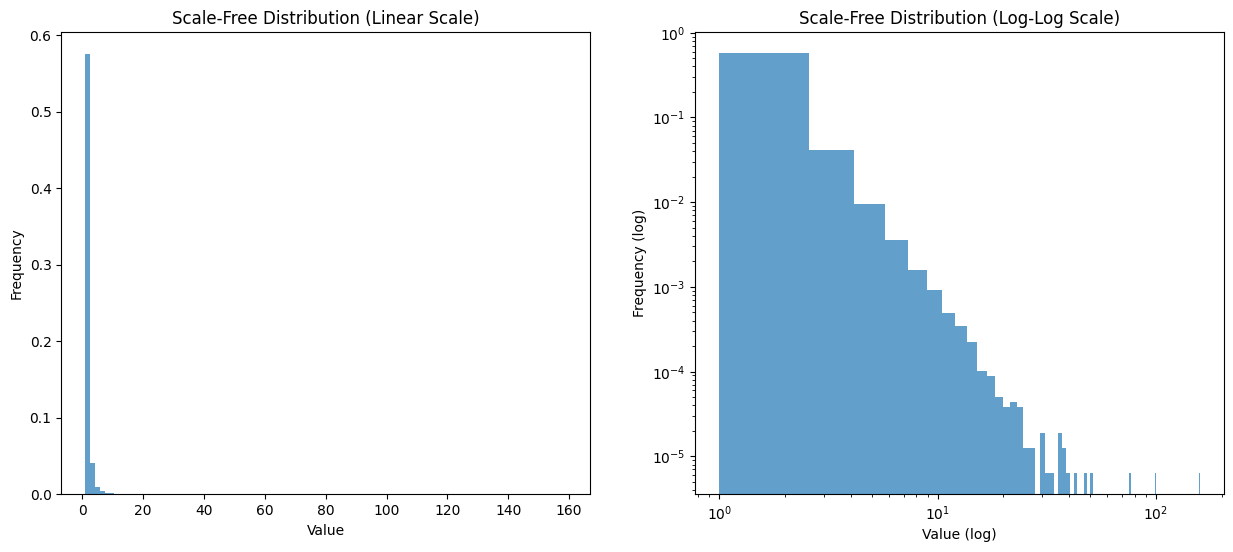

In [3]:
import matplotlib.pyplot as plt

# Generate scale-free distribution
def scale_free_distribution(n, alpha):
    return (np.random.pareto(alpha, n) + 1)

# Parameters
n = 100000  # number of data points
alpha = 2.5 # power law exponent

# Generate data
data = scale_free_distribution(n, alpha)

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Linear scale plot
ax1.hist(data, bins=100, density=True, alpha=0.7)
ax1.set_title('Scale-Free Distribution (Linear Scale)')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')

# Log-log scale plot
ax2.hist(data, bins=100, density=True, alpha=0.7)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_title('Scale-Free Distribution (Log-Log Scale)')
ax2.set_xlabel('Value (log)')
ax2.set_ylabel('Frequency (log)')

plt.show()

# Calculate necessary statistics
data_mean = data.mean()
data_std = data.std()
data_min = data.min()
data_max = data.max()

In [4]:
# Perform KS test
ks_statistic, p_value = stats.kstest(data, 'powerlaw', args=[alpha])

print(f"KS Statistic for Powerlaw Distribution: {ks_statistic}")
print(f"p-value for Powerlaw Distribution: {p_value}")


ks_statistic, p_value = stats.kstest(data, 'norm', args=[alpha])

print(f"KS Statistic for Normal Distribution: {ks_statistic}")
print(f"p-value for Normal Distribution: {p_value}")

ks_statistic, p_value = stats.kstest(data, 'expon', args=[alpha])

print(f"KS Statistic for Exponential Distribution: {ks_statistic}")
print(f"p-value for Exponential Distribution: {p_value}")

ks_statistic, p_value = stats.kstest(data, 'uniform', args=[alpha])

print(f"KS Statistic for Uniform Distribution: {ks_statistic}")
print(f"p-value for Uniform Distribution: {p_value}")

KS Statistic for Powerlaw Distribution: 1.0
p-value for Powerlaw Distribution: 0.0
KS Statistic for Normal Distribution: 0.5290443762590122
p-value for Normal Distribution: 0.0
KS Statistic for Exponential Distribution: 0.9007798800156714
p-value for Exponential Distribution: 0.0
KS Statistic for Uniform Distribution: 0.9007798800156642
p-value for Uniform Distribution: 0.0


In [5]:
# skewness
numeric_columns = stack_df.select_dtypes(include=[np.number]).columns
skewness = stack_df[numeric_columns].skew()
print("Skewness:\n", skewness, sep="")


Skewness:
Score             5.146821
ViewCount        18.990331
AnswerCount       2.892854
CommentCount      2.474504
FavoriteCount    40.331947
dtype: float64


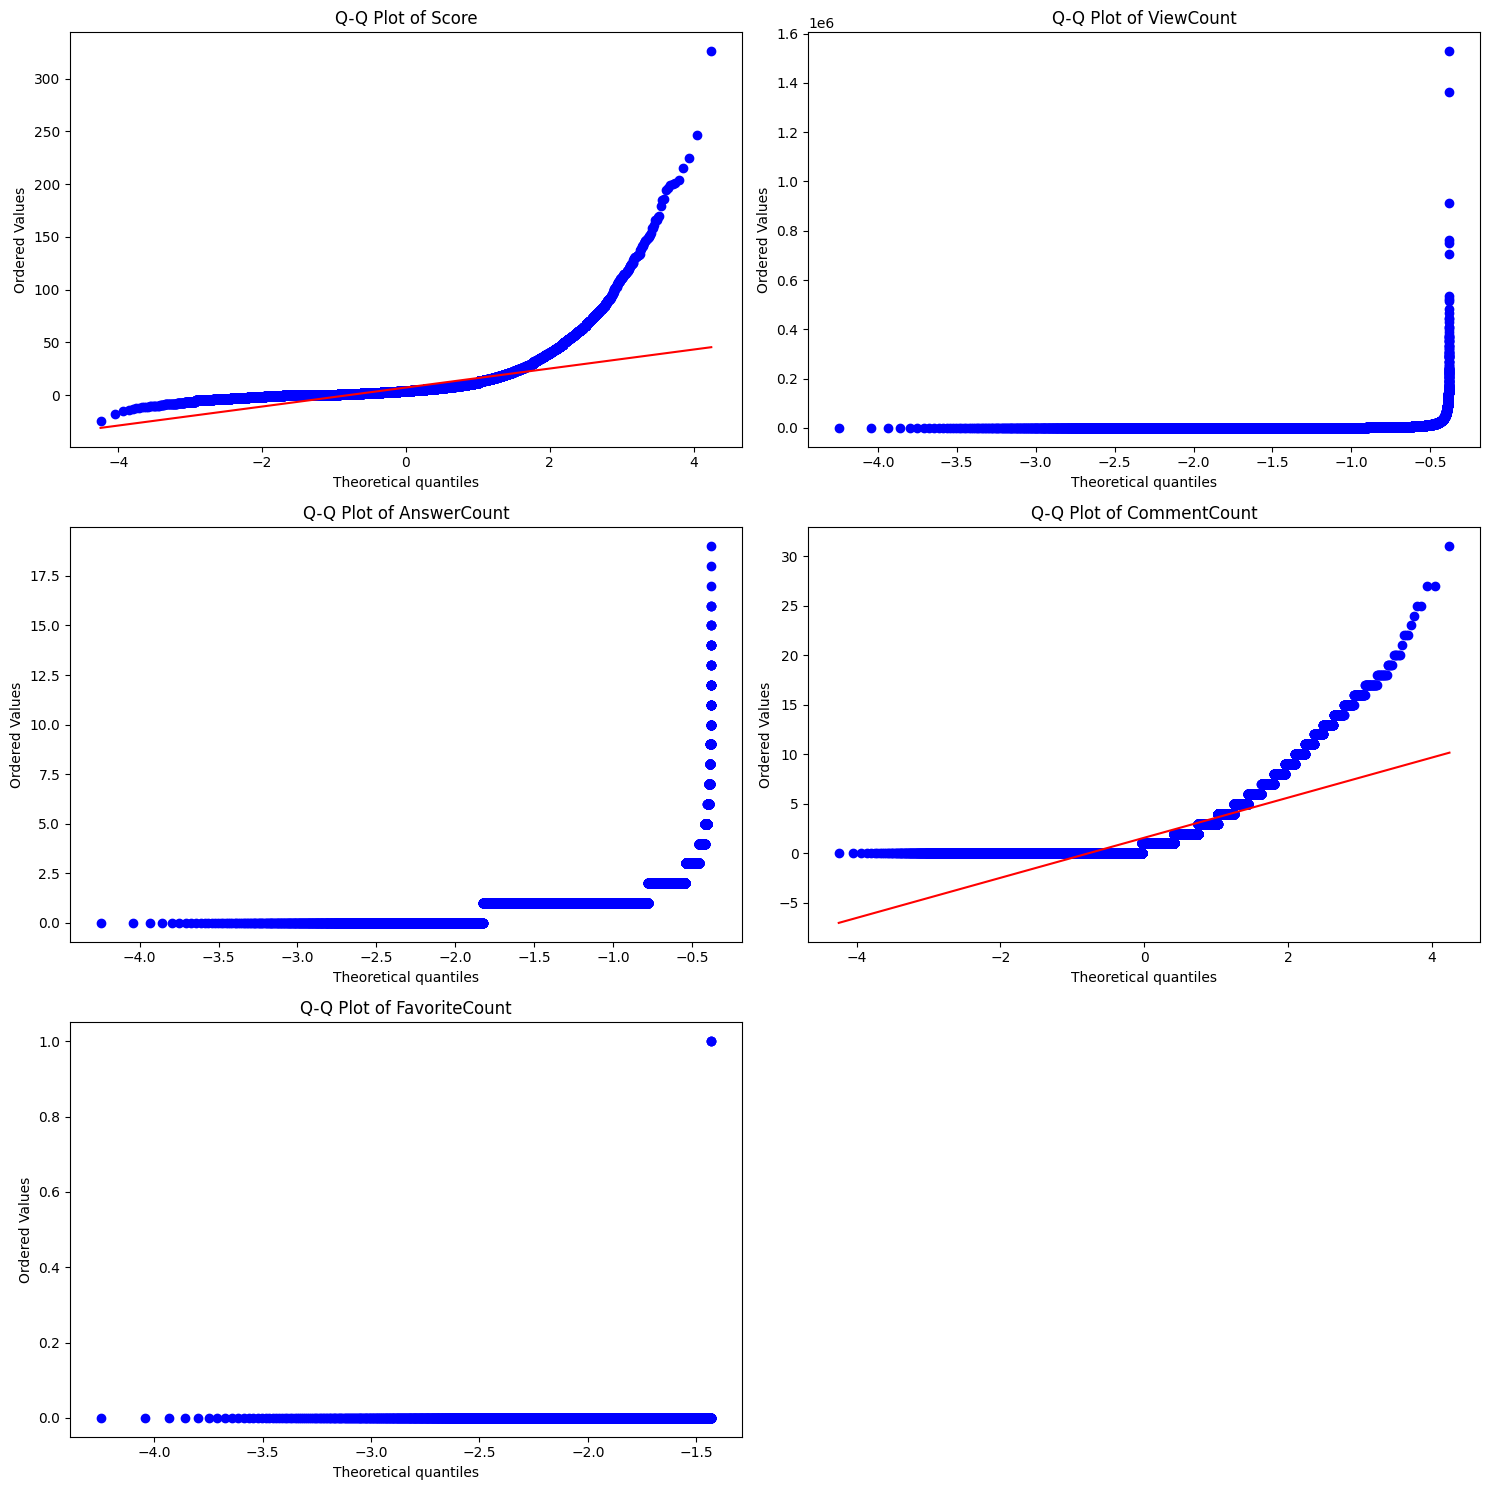

In [6]:
# Set up the grid based on the number of numeric columns
n_cols = len(numeric_columns)
fig, axes = plt.subplots((n_cols + 1) // 2, 2, figsize=(15, 5 * ((n_cols + 1) // 2)))
axes = axes.flatten()

# Create Q-Q plots
for i, column in enumerate(numeric_columns):
    stats.probplot(stack_df[column], dist="norm", plot=axes[i])
    axes[i].set_title(f"Q-Q Plot of {column}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Exercise 3. Comparing questions to answers 

In the walkthrough it was shown that there were both questions and answers in this data. Take one of the numeric columns that would apply to both questions and answers. Are the distributions similar? First plot them side-by-side, and then do a `kstest` but this time to compare one distribution to the other.  So in this case, if the questions were stored in a series called `question_score` and the answers in a series called `answer_score`, the test would be: 

~~~ 
ks_statistic, p_value = stats.ks_2samp(question_score, answer_score)
~~~

Print the mean, median, mode, max, and min for each distribution. Then print the results of the `kstest`. Speculate on the reason why you observed these results. What might this say about the difference between behaviour related to questions and behaviour related to answers?   

## E3. Your code

In [7]:
new_labels = {
    '1': "Question",
    '2': "Answer", 
    '3': "Orphaned tag wiki",
    '4': "Tag wiki excerpt",
    '5': "Tag wiki",
    '6': "Moderator nomination", 
    '7': "Wiki placeholder"    
}

# Filter for questions and answers
stack_df["PostTypeLabel"] = stack_df["PostTypeId"].map(new_labels)
question_score = stack_df[stack_df["PostTypeLabel"] == "Question"]["Score"]
answer_score = stack_df[stack_df["PostTypeLabel"] == "Answer"]["Score"]

# Display the number of rows for each
print(f"The data has {len(question_score)} question scores.")
print(f"The data has {len(answer_score)} answer scores.")


The data has 22570 question scores.
The data has 37036 answer scores.


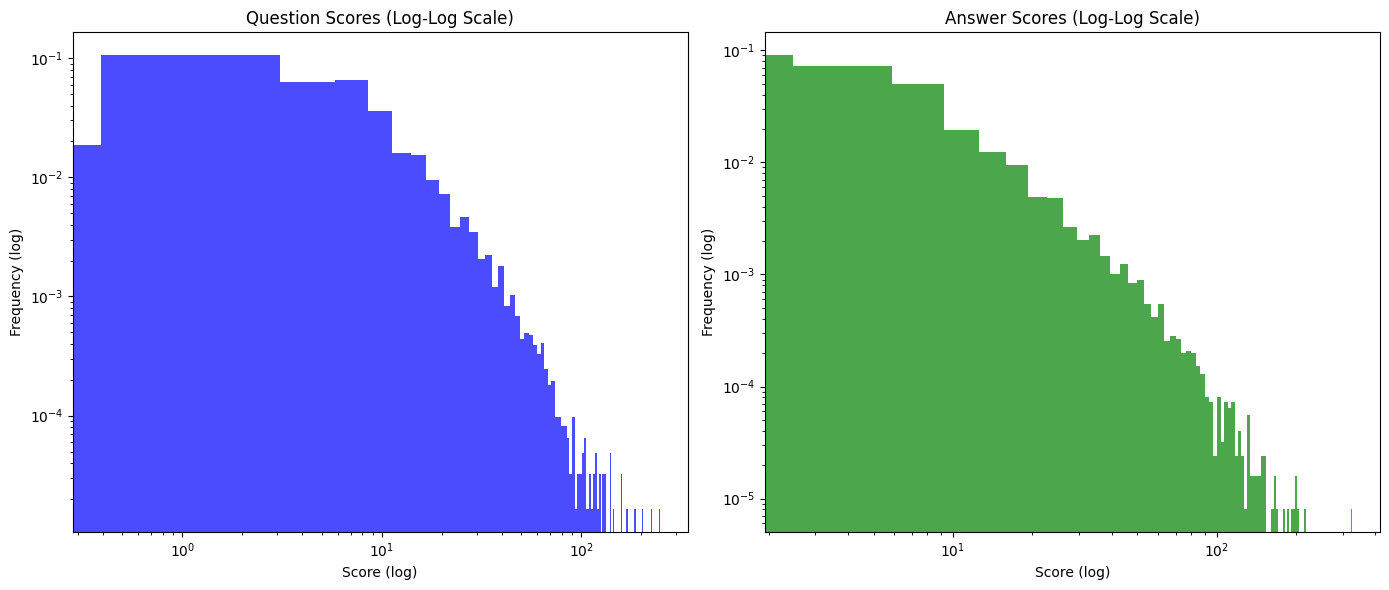

In [8]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Log-log scale plot for question scores
ax1.hist(question_score, bins=100, density=True, alpha=0.7, color='blue')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_title('Question Scores (Log-Log Scale)')
ax1.set_xlabel('Score (log)')
ax1.set_ylabel('Frequency (log)')

# Log-log scale plot for answer scores
ax2.hist(answer_score, bins=100, density=True, alpha=0.7, color='green')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_title('Answer Scores (Log-Log Scale)')
ax2.set_xlabel('Score (log)')
ax2.set_ylabel('Frequency (log)')

# Show the plot
plt.tight_layout()
plt.show()

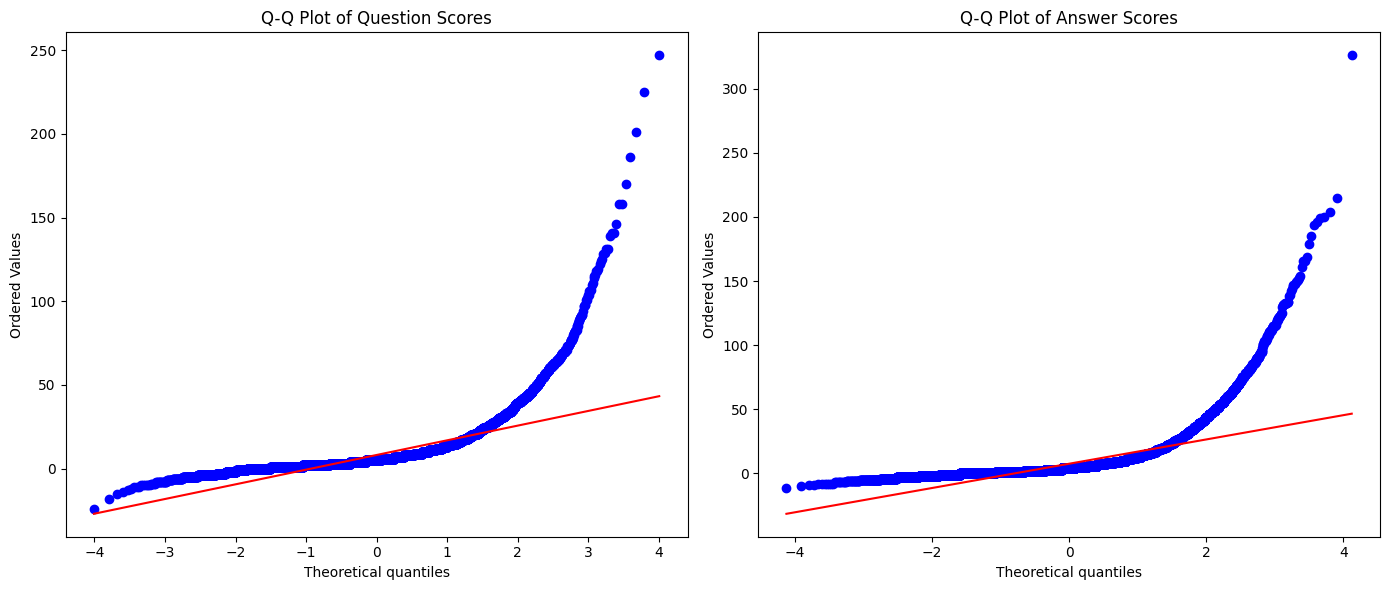

In [9]:
# Set up a grid with 1 row and 2 columns for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Q-Q plot for question scores
stats.probplot(question_score, dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot of Question Scores')

# Q-Q plot for answer scores
stats.probplot(answer_score, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of Answer Scores')

# Adjust layout
plt.tight_layout()
plt.show()

In [10]:
print("\nQuestion Scores Statistics:")
print(question_score.describe())

print("\nAnswer Scores Statistics:")
print(answer_score.describe())

ks_statistic, p_value = stats.ks_2samp(question_score, answer_score)

print(f"\nKS Statistic: {ks_statistic} and {p_value}" )


Question Scores Statistics:
count    22570.000000
mean         8.173150
std         11.042262
min        -24.000000
25%          2.000000
50%          5.000000
75%         10.000000
max        247.000000
Name: Score, dtype: float64

Answer Scores Statistics:
count    37036.000000
mean         7.569149
std         12.441472
min        -11.000000
25%          1.000000
50%          4.000000
75%          9.000000
max        326.000000
Name: Score, dtype: float64

KS Statistic: 0.10991740520174531 and 5.055724905827485e-148


# Exercise 4. Tabulating univariate categorical data

While categorical data can be plot as a distribution, it would mainly be the frequency of the unique categories as a bar chart or a pie chart. To that end, it is often just as useful to tabulate the data instead. The simplest way to do this in pandas is to use the `value_counts()` method, which creates a new Series with the index being the categories and the counts of their frequency being the rows of the Series. 

Below, practice tabulating categorical data by finding a way to table the top categories of a distribution but truncating the table. You can truncate the table by omitting the categories with small N, but it would be more preferable to create a new category called 'other' which will include a count of the remaining data.

In [11]:
## STARTER CODE
def tabulate_categorical_basic(series: pd.Series, top_n: int = 4):
    counts = series.value_counts()
    top_counts = counts[:top_n]
    other_count = counts[top_n:].sum()
    if other_count > 0:
        top_counts["Other"] = other_count
    result = top_counts.reset_index()
    result.columns = ["PostTypeId", "count"]
    
    return result

tabulated_data = tabulate_categorical_basic(stack_df["PostTypeId"], top_n = 4)
print(tabulated_data)


  PostTypeId  count
0          2  37036
1          1  22570
2          5   2211
3          4   2211
4      Other     26


## YOUR CODE BELOW

In [12]:
## YOUR CODE HERE

# AI Declaration 

Below we would like you to draft a few sentences indicating how AI code tools were used in this assignment. You can review the declaration in the virtual walkthrough for reference. 

I used ChatGPT while coding but also adjusted it to fit the requirement as well as Prof. Hogan's virtual walkthrough.


# Appendix: Some starter code for plotting

In addition to the code in the virtual walkthrough, below is also some code that can be used. Notice that this code uses several Python conventions that we would recommend but are not strictly necessary: 
- **Type hinting**: This is where the arguments also specify their type, so instead of `def new_function(var):` one would write `def new_function(var: str)` to signal that it should take a string variable. Similarly writing `def new_function(var) -> str:` would signal that the function should return a string value. These are not rules for Python, but signals for a debugger. 
- **PyDoc**. Notice the `"""` just below the function names. This first line under the function is used to describe the name of the function. There are many variations in how this is written. Generally be succinct in here, but there are conventions for more involved comments in functions. To get a sense of these, simply start reading others' source code as well as refer to PEP-8, which is the Python recommendation for coding style. 
- **Robustness checks**: Notice that that `single_continuous_plot` uses "Duck typing" to check for a label and if not present creates one from the variable name.

In [13]:
# Starter code 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def single_continuous_plot(series: pd.Series, xlabel: str | None = None) -> None:
    """
    Plots a histogram of a single continuous variable.
    """
    if xlabel is None:
        xlabel = series.name.capitalize()
    plt.figure(figsize=(10, 6))
    # Note: The below function has a lot of optional arguments, which you can check out:
    # https://seaborn.pydata.org/generated/seaborn.histplot.html
    sns.histplot(data=series, kde=True)
    plt.title(f"Distribution of {xlabel}")
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.show()


def facet_continuous_plot(df: pd.DataFrame, colname: str, facet: str) -> None:
    """
    Facets a continous variables (`colname`) by a categorical variable (`facet`).
    """

    g = sns.FacetGrid(df, col=facet, col_wrap=3, height=5)
    g.map(sns.histplot, colname, kde=True)
    g.set_axis_labels(colname, "Count")
    g.set_titles("{col_name}")
    plt.tight_layout()
    plt.show()


def two_continuous_plot(df: pd.DataFrame, colname1: str, colname2: str) -> None:
    """
    Plots two continous variables against each other in a scatter plot.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=colname1, y=colname2)
    plt.title(f'{colname1} vs {colname2}')
    plt.xlabel(colname1)
    plt.ylabel(colname2)
    plt.show()

# Example data for showing the plots
EXAMPLE_DATA = pd.DataFrame(
    {
        "age": np.random.randint(18, 65, 100),
        "sex": np.random.choice(["m", "f", "o"], 100),
        "height": np.random.randint(150, 200, 100),
    }
)

# Plot all three plots in a column
single_continuous_plot(EXAMPLE_DATA["age"])
facet_continuous_plot(EXAMPLE_DATA, colname="height", facet="sex")
two_continuous_plot(EXAMPLE_DATA, colname1="age", colname2="height")



TypeError: unsupported operand type(s) for |: 'type' and 'NoneType'